# Машинное обучение,  ВМК МГУ

## Практическое задание 1

### Общая информация
Дата выдачи: 17.09.2019 

Мягкий дедлайн: 23:59MSK 30.09.2020 **(за каждый день просрочки снимается 1 балл)**

Жесткий дедлайн: 23:59MSK 07.10.2020  

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В каждом разделе вам предлагается выполнить несколько заданий. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотекам pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написаем production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [1]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

А это ___ячейка с текстом___.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. #Делать 
##заголовки 
###разного уровня
3. Выделять *текст* <s>при</s> **необходимости**
4. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки:
<img src="https://st2.depositphotos.com/1177973/9266/i/950/depositphotos_92668716-stock-photo-red-cat-with-computer-keyboard.jpg" style="width: 400px">



## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Данные можно скачать [отсюда](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0).

## Внимание! 

* **Везде, где в формулровке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).**

* **Использование циклов в (текущей) секции 1 влечет к снижению оценки!**

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

Похоже, что это список заказов в каком-то ресторане, в таблице 4622 строк и 5 столбцов с информацией о номере заказа, количестве, названии, комментариях и цене отдельных блюд в заказе.

In [4]:
d = pd.read_csv('hw-practice-1.data.csv')
d

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]     $3.39   
2                                               [Apple]     $3.39   
3                                                   NaN     $2.39   
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
...                                                 ...        ...  
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...    $11.75   
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...    $11.75   
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...    $11.25   
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...     $8.75   
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...     $8.75   

[4622 rows x 5 columns]

#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов (order_id) попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

В выбоке 1834 заказов и 50 уникальных категорий товара, однако стоит обратить внимание, что некоторые категории товаров повторены несколько раз с разным написанием.

In [5]:
d['order_id'].nunique(), d['item_name'].nunique()

(1834, 50)

#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

Есть пропуски в колонке `choice_description`.

In [6]:
for c in d.columns:
    print(c, d[c].isnull().any())

order_id False
quantity False
item_name False
choice_description True
item_price False


_Заполните пропуски пустой строкой для строковых колонок и нулём для числовых._

In [7]:
d.loc[d['choice_description'].isnull(), 'choice_description'] = ''

#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Ответьте, какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).
Будьте внимательны! В item_price записана цена товара * количество товара.

In [8]:
d['total_cost_usd'] = d.apply(lambda v: float(v['item_price'].lstrip('$')), axis=1)
d['single_cost_usd'] = d.apply(lambda v: v['total_cost_usd'] / v['quantity'], axis=1)

**Какая средняя/минимальная/максимальная цена у товара?**

In [9]:
d['single_cost_usd'].mean(), d['single_cost_usd'].min(), d['single_cost_usd'].max()

(7.084424491562094, 1.09, 11.89)

_Удалите старую колонку с ценой._

In [10]:
del d['item_price']

#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (уникальный товар = уникальный choice_description)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [11]:
cols = ['single_cost_usd', 'item_name', 'choice_description']
cost_stats = d.sort_values(by=cols)[cols].drop_duplicates()
display(cost_stats.head(5))
display(cost_stats.tail(5))

single_cost_usd      item_name choice_description
34              1.09  Bottled Water                   
126             1.09    Canned Soda        [Coca Cola]
162             1.09    Canned Soda        [Diet Coke]
117             1.09    Canned Soda  [Diet Dr. Pepper]
28              1.09    Canned Soda       [Dr. Pepper]

single_cost_usd         item_name  \
3120            11.89  Steak Salad Bowl   
749             11.89  Steak Salad Bowl   
281             11.89  Steak Salad Bowl   
613             11.89  Steak Salad Bowl   
2804            11.89  Steak Salad Bowl   

                                     choice_description  
3120  [Roasted Chili Corn Salsa, [Fajita Vegetables,...  
749   [Roasted Chili Corn Salsa, [Rice, Cheese, Lett...  
281   [Tomatillo Red Chili Salsa, [Black Beans, Chee...  
613   [Tomatillo Red Chili Salsa, [Fajita Vegetables...  
2804  [Tomatillo Red Chili Salsa, [Rice, Black Beans...

#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)? Подсказка: можно как и группировать по order_id, так и не делать этого, а считать по quantity.

In [12]:
bowl_orders = d[d['item_name'] == 'Chicken Bowl']
q_per_order = bowl_orders.groupby('order_id')['quantity'].sum()

(q_per_order > 1).sum()

114

#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [13]:
per_order = d.groupby('order_id')
per_order['total_cost_usd'].sum().mean(), per_order['quantity'].sum().mean()

(18.811428571428568, 2.711014176663032)

#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [14]:
(per_order['quantity'].sum() == 1).sum()

56

#### 9. [0.25 баллов] Какая самая популярная категория товара? (в комментариях поясните, что вы считаете под термином "популярность")

За популярность я считал

1. суммарное количество купленных товаров из данной категории
2. количество различных заказов, в которых присутствовал товар из данной категории

Оба способа подсчета дают один и тот же самый популярный товар - `Chicken Bowl`

In [15]:
per_item = d.groupby('item_name')
per_item['quantity'].sum().idxmax(), per_item['order_id'].nunique().idxmax()

('Chicken Bowl', 'Chicken Bowl')

#### 10. [0.5 баллов] Какие виды Burrito существуют?

In [16]:
burritos = d[d['item_name'].apply(lambda v: 'Burrito' in v)]
burritos['item_name'].unique()

array(['Steak Burrito', 'Chicken Burrito', 'Barbacoa Burrito',
       'Carnitas Burrito', 'Veggie Burrito', 'Burrito'], dtype=object)

#### Какой из них чаще всего покупают?

In [17]:
burritos.groupby('item_name').nunique().idxmax()['order_id']

'Chicken Burrito'

#### Какой из них самый дорогой?
Цена буррито может меняться в зависимости от выбора опций (`choice_description`).
Самый дорогой (в среднем) - `Steak Burrito`.

In [18]:
burritos.groupby('item_name').mean().idxmax()['single_cost_usd']

'Steak Burrito'

#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно средний чек, добавить его в исходные данные и сделать необходимые проверки.

In [19]:
(per_order['single_cost_usd'].max() > 0.4 * per_order['total_cost_usd'].sum()).sum()

1589

#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано товара Diet Coke. Не забывайте, что количество товара не всегда равно 1, а также не всегда цена за единицу товара равняется 1.25.

In [20]:
mask = (d['choice_description'] == '[Diet Coke]') & np.isclose(d['single_cost_usd'], 1.25)
full_profit = d['total_cost_usd'].sum()
before = d.loc[mask, 'total_cost_usd'].sum()

d.loc[mask, 'single_cost_usd'] += 0.10
d.loc[mask, 'total_cost_usd'] = d.loc[mask, 'single_cost_usd'] * d.loc[mask, 'quantity']

after = d.loc[mask, 'total_cost_usd'].sum()
profit_delta = after - before

print(f"{profit_delta/full_profit:%}")

0.033333%


#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [21]:
data = np.random.rand(10, 3)
data = pd.DataFrame(data, columns=['index', 'column1', 'column2'])
data = data.set_index('index')

_Сохраните DataFrame на диск в формате csv **без индексов и названий столбцов.**_

In [22]:
data.to_csv('random.so.csv', index=False, header=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. **Не менее важно усвоить базовые принципы визуализаций:**
- должно быть название (plt.title) графика;
- на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel);
- должны быть подписаны единицы измерения;
- все названия должны быть понятны любому рандомному человеку с улицы :) Любой человек должен понимать, что на графике изображено, **не заглядывая в код**;
- если изображено несколько графиков, то необходима поясняющая легенда (plt.legend);
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.

На самом деле мы уже импортировали matplotlib внутри %matplotlib inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [23]:
import datetime
import random

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=d.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(d.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
d['date'] = d.order_id.map(dates['date'])

#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot. Также может быть удобно изобразить гистограмму в логарифмической шкале (см. semilogy).

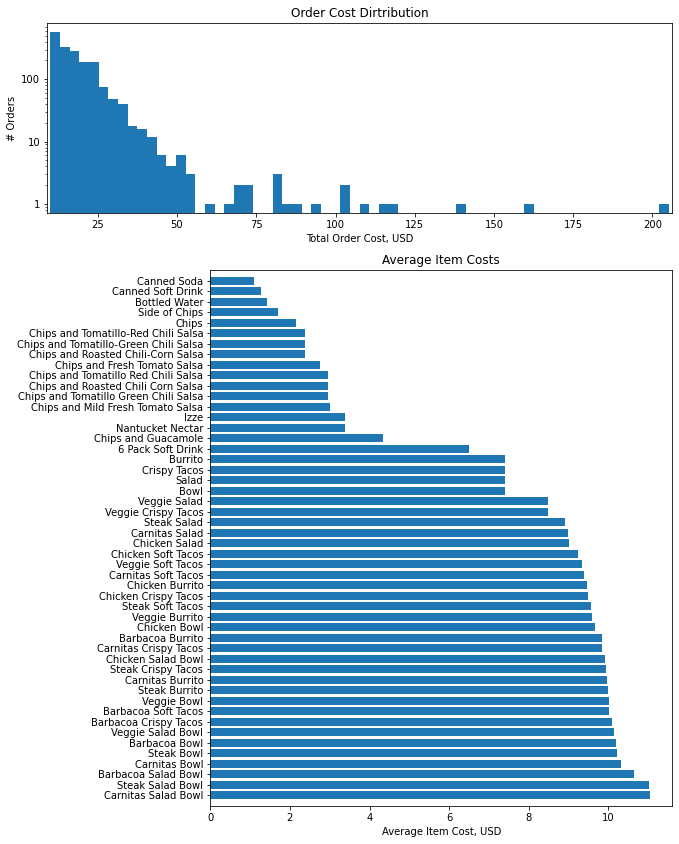

In [24]:
plt.rcParams['figure.figsize'] = [1.75 * 6.4, 3 * 4.8]

order_cost = d.groupby('order_id')['total_cost_usd'].sum()

fig = plt.figure()
gs = mpl.gridspec.GridSpec(16, 4)
axs = [fig.add_subplot(gs[:4, :]), fig.add_subplot(gs[5:, 1:])]

axs[0].hist(order_cost, bins=64)
axs[0].set_xlim(order_cost.min() - 1, order_cost.max() + 1)
axs[0].set_ylabel('# Orders')
axs[0].set_yscale('log')
axs[0].get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
axs[0].set_xlabel('Total Order Cost, USD')
axs[0].set_title('Order Cost Dirtribution')

item_cost = d.groupby('item_name')['single_cost_usd'].mean().sort_values(ascending=False)
ticks = np.arange(len(item_cost))
axs[1].barh(ticks, item_cost)
axs[1].set_yticks(ticks)
axs[1].set_yticklabels(item_cost.index)
axs[1].set_ylim(-1, len(item_cost))
axs[1].set_xlabel('Average Item Cost, USD')
axs[1].set_title('Average Item Costs');

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

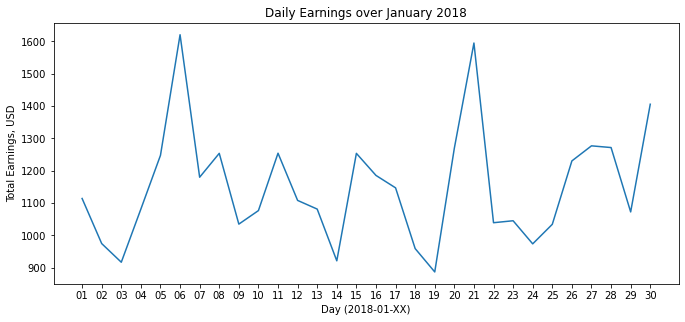

In [25]:
plt.rcParams['figure.figsize'] = [1.75 * 6.4, 4.8]

per_day = d.groupby('date')
earnings = per_day['total_cost_usd'].sum()
days = earnings.index.map(lambda v: v.split('-')[-1])

plt.plot(days, earnings)
plt.xlabel('Day (2018-01-XX)')
plt.ylabel('Total Earnings, USD')
plt.title('Daily Earnings over January 2018');

#### 3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

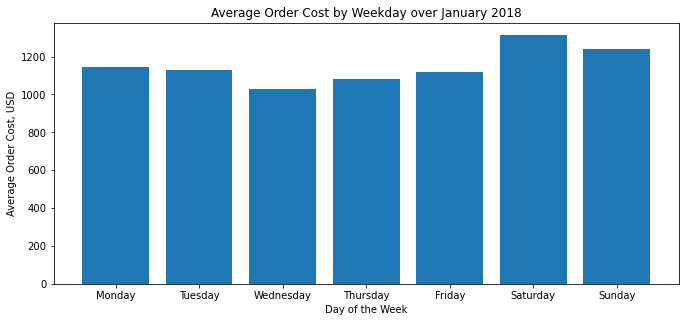

In [26]:
plt.rcParams['figure.figsize'] = [1.75 * 6.4, 4.8]

import calendar

d['weekday'] = d['date'].apply(lambda v: datetime.datetime.strptime(v, '%Y-%m-%d').weekday())
per_week = d.groupby(['date', 'weekday'])['total_cost_usd'].sum().groupby('weekday').mean().sort_index()

ticks = np.arange(len(per_week.index))
plt.bar(ticks, per_week)
plt.xticks(ticks=ticks, labels=[calendar.day_name[i] for i in ticks])
plt.ylabel('Average Order Cost, USD')
plt.xlabel('Day of the Week')
plt.title('Average Order Cost by Weekday over January 2018');

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot). В комментариях можете пояснить, как поняли это задание и что посчитали, разумные объяснения будут засчитываться.

Я понял задание так:

Постройте scatter plot график зависимости
> средней стоимости данного товара (`single_cost_usd mean`)

от
> суммарного количества проданных штук товара (`quantity sum`)

Ось "суммарное количество штук товара" - логарифмическая.

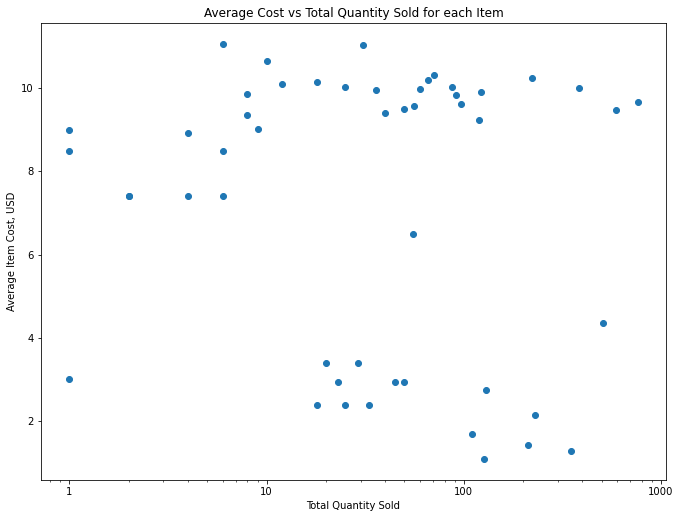

In [27]:
plt.rcParams['figure.figsize'] = [1.75 * 6.4, 1.75 * 4.8]

fig, ax = plt.subplots()

per_item = d.groupby('item_name')
ax.scatter(per_item['quantity'].sum(), per_item['single_cost_usd'].mean())
ax.set_xscale('log')
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlabel('Total Quantity Sold')
ax.set_ylabel('Average Item Cost, USD')
ax.set_title('Average Cost vs Total Quantity Sold for each Item');

Сохраните график в формате pdf (так он останется векторизованным).

In [28]:
fig.savefig('plot.so.pdf')

## Это интересно!
* Кстати, существует надстройка над matplotlib под названием [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Иногда удобнее и красивее делать визуализации через неё. 
* Для рисования графиков, с которыми можно взаимодействовать онлайн, есть библиотека [plotly](https://plot.ly/python/). Для запуска оффлайн может пригодиьтся from plotly.offline import init_notebook_mode init_notebook_mode(connected=True). Хороший пример использования: https://habr.com/en/post/308162/